In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [3]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff100/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass        isMultiple        compMass            systemMass              e                 log_a               age        
------------------- ---------- --------------------- ------------------- -------------------- ------------------ ------------------
0.15548709189209567        0.0                    [] 0.15548709189209567                  nan                nan 19.927175803177988
0.05590752081313288        0.0                    [] 0.05590752081313288                  nan                nan 19.927175803177988
 15.152175805062605        0.0                    []  15.152175805062605                  nan                nan 19.896860825946256
0.19833611713212587        0.0                    [] 0.19833611713212587                  nan                nan 19.980296008051358
                ...        ...                   ...                 ...                  ...                ...                ...
 0.7087321180887948        1.0  [0.3160290611074498]  1.0247611791962445 0.0

In [4]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 7.297141350870765
Max log age = 7.301155348493374
Min level age = 19821720.63142749
Max level age = 20005773.544311523


In [5]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1352
[0.16312509029104827, 0.09636490446440792, 0.017003777999204207, 0.03636643773183382, 0.21849298240279427, 0.10166459547430746, 0.03651675631669997, 0.019132423710002903, 0.12247264926103713, 0.6385500001324462, 0.2022302569658592, 0.07471903553293849, 0.16814292142663018, 0.011007644292289143, 0.0230523225129767, 0.1609042880961581, 0.2688387764755287, 0.012694034520736917, 0.09389877662294215, 0.024808470564410257, 0.537538199511473, 0.10413768535122994, 0.1908368021249771, 0.1895631651814792, 0.09792501441534668, 0.05503713712096214, 0.014894501085541238, 0.16944725553078624, 0.03849610313773155, 0.03068110511487832, 0.010428669715904573, 0.08125256687517324, 0.16246923291724738, 0.1713331396330831, 0.010724686463596327, 0.030670575167798916, 0.02728213963323672, 0.045772770042914156, 0.15501195511789118, 0.026778635366288318, 0.016255424024083663, 0.03575262254606042, 0.1309257580510967, 0.7052331632631441, 0.05378693756462908, 0.09028542237526906, 0.03368280383489044, 0.55107

In [6]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[7.29003461 7.30103    7.31175386]
[19500000. 20000000. 20500000.]


In [7]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=2.50 for T= 12437 logg=2.50
Changing to logg=2.50 for T= 12267 logg=2.48
Changing to logg=2.50 for T= 12099 logg=2.45
Changing to logg=2.50 for T= 11934 logg=2.43
Changing to logg=2.50 for T= 11771 logg=2.41
Changing to logg=2.00 for T=  9057 logg=1.99
Isochrone generation took 54.191121 s.
Making photometry for isochrone: log(t) = 7.29  AKs = 0.00  dist = 410
     Starting at:  2023-12-19 04:08:34.788094   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  3007 K  m_jwst_F115W = 16.28
M =   1.668 Msun  T =  7913 K  m_jwst_F115W = 10.22
M =   5.616 Msun  T = 17844 K  m_jwst_F115W = 7.48
M =  11.155 Msun  T = 20697 K  m_jwst_F115W = 4.65
M =  11.214 Msun  T = 10114 K  m_jwst_F115W = 2.44
M =  11.236 Msun  T =  3587 K  m_jwst_F115W = 0.56
M =  11.857 Msun  T =  3565 K  m_jwst_F115W = 0.47
Starting filter: jwst,F182M   Elapsed time: 14.80 seconds
Starting synthetic photometry
M =   0.100 M

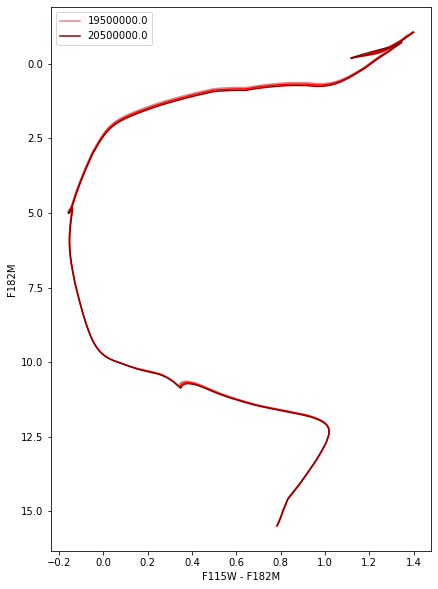

In [8]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [9]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/12-18')
import interpolatorExp as interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
for i in range(len(stars)):
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)
    
# convert luminosity values to solar luminosities
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun

for i in range(len(stars)):
    if stars[i] is None:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun
    
for i in range(len(stars)):
    print(stars[i])

Desired mass 0.05590752081313288 is outside the range of the isochrone.
Desired mass 0.05590752081313288 is outside the range of the isochrone.
Desired mass 15.152175805062605 is outside the range of the isochrone.
Desired mass 15.152175805062605 is outside the range of the isochrone.
Desired mass 0.024091260296864203 is outside the range of the isochrone.
Desired mass 0.024091260296864203 is outside the range of the isochrone.
Desired mass 85.6411399717537 is outside the range of the isochrone.
Desired mass 85.6411399717537 is outside the range of the isochrone.
Desired mass 0.06956745444329208 is outside the range of the isochrone.
Desired mass 0.06956745444329208 is outside the range of the isochrone.
Desired mass 0.07430593953238106 is outside the range of the isochrone.
Desired mass 0.07430593953238106 is outside the range of the isochrone.
Desired mass 0.02640447135116942 is outside the range of the isochrone.
Desired mass 0.02640447135116942 is outside the range of the isochrone

Desired mass 0.04873664380881346 is outside the range of the isochrone.
Desired mass 0.04873664380881346 is outside the range of the isochrone.
Desired mass 0.043282901343875496 is outside the range of the isochrone.
Desired mass 0.043282901343875496 is outside the range of the isochrone.
Desired mass 0.03480380263921519 is outside the range of the isochrone.
Desired mass 0.03480380263921519 is outside the range of the isochrone.
Desired mass 0.04608353599905968 is outside the range of the isochrone.
Desired mass 0.04608353599905968 is outside the range of the isochrone.
Desired mass 0.05035327842384329 is outside the range of the isochrone.
Desired mass 0.05035327842384329 is outside the range of the isochrone.
Desired mass 0.02113459638496537 is outside the range of the isochrone.
Desired mass 0.02113459638496537 is outside the range of the isochrone.
Desired mass 0.023769991999980943 is outside the range of the isochrone.
Desired mass 0.023769991999980943 is outside the range of the

Desired mass 0.08252615918975577 is outside the range of the isochrone.
Desired mass 0.08252615918975577 is outside the range of the isochrone.
Desired mass 0.041099380743378336 is outside the range of the isochrone.
Desired mass 0.041099380743378336 is outside the range of the isochrone.
Desired mass 0.03515777556258486 is outside the range of the isochrone.
Desired mass 0.03515777556258486 is outside the range of the isochrone.
Desired mass 0.04186760773078396 is outside the range of the isochrone.
Desired mass 0.04186760773078396 is outside the range of the isochrone.
Desired mass 0.03266682762406117 is outside the range of the isochrone.
Desired mass 0.03266682762406117 is outside the range of the isochrone.
Desired mass 0.02370711431343094 is outside the range of the isochrone.
Desired mass 0.02370711431343094 is outside the range of the isochrone.
Desired mass 0.06251229982991 is outside the range of the isochrone.
Desired mass 0.06251229982991 is outside the range of the isochro

Desired mass 0.0718504249441995 is outside the range of the isochrone.
Desired mass 0.0718504249441995 is outside the range of the isochrone.
Desired mass 0.06887695101625031 is outside the range of the isochrone.
Desired mass 0.06887695101625031 is outside the range of the isochrone.
Desired mass 0.09216122750825127 is outside the range of the isochrone.
Desired mass 0.09216122750825127 is outside the range of the isochrone.
Desired mass 0.09371310915672697 is outside the range of the isochrone.
Desired mass 0.09371310915672697 is outside the range of the isochrone.
Desired mass 0.051659471317114763 is outside the range of the isochrone.
Desired mass 0.051659471317114763 is outside the range of the isochrone.
Desired mass 0.014118383610714907 is outside the range of the isochrone.
Desired mass 0.014118383610714907 is outside the range of the isochrone.
Desired mass 0.061660575692245236 is outside the range of the isochrone.
Desired mass 0.061660575692245236 is outside the range of the

Desired mass 0.09215063241501964 is outside the range of the isochrone.
Desired mass 0.09215063241501964 is outside the range of the isochrone.
Desired mass 0.07102764884706883 is outside the range of the isochrone.
Desired mass 0.07102764884706883 is outside the range of the isochrone.
Desired mass 0.04642692413230526 is outside the range of the isochrone.
Desired mass 0.04642692413230526 is outside the range of the isochrone.
Desired mass 0.02679451847367232 is outside the range of the isochrone.
Desired mass 0.02679451847367232 is outside the range of the isochrone.
Desired mass 0.06851794297738159 is outside the range of the isochrone.
Desired mass 0.06851794297738159 is outside the range of the isochrone.
Desired mass 0.04183409482914502 is outside the range of the isochrone.
Desired mass 0.04183409482914502 is outside the range of the isochrone.
Desired mass 0.08651397027534982 is outside the range of the isochrone.
Desired mass 0.08651397027534982 is outside the range of the iso

Desired mass 0.05300793075293987 is outside the range of the isochrone.
Desired mass 0.05300793075293987 is outside the range of the isochrone.
Desired mass 0.03691986907932824 is outside the range of the isochrone.
Desired mass 0.03691986907932824 is outside the range of the isochrone.
Desired mass 0.0647213953373115 is outside the range of the isochrone.
Desired mass 0.0647213953373115 is outside the range of the isochrone.
Desired mass 0.020623492485525405 is outside the range of the isochrone.
Desired mass 0.020623492485525405 is outside the range of the isochrone.
Desired mass 0.013441907171553627 is outside the range of the isochrone.
Desired mass 0.013441907171553627 is outside the range of the isochrone.
Desired mass 0.09856253277399946 is outside the range of the isochrone.
Desired mass 0.09856253277399946 is outside the range of the isochrone.
Desired mass 0.03852943285222399 is outside the range of the isochrone.
Desired mass 0.03852943285222399 is outside the range of the i

Desired mass 0.03778219684929181 is outside the range of the isochrone.
Desired mass 0.03778219684929181 is outside the range of the isochrone.
Desired mass 0.06557315208781225 is outside the range of the isochrone.
Desired mass 0.06557315208781225 is outside the range of the isochrone.
Desired mass 0.0694618036194341 is outside the range of the isochrone.
Desired mass 0.0694618036194341 is outside the range of the isochrone.
Desired mass 0.07747554907705309 is outside the range of the isochrone.
Desired mass 0.07747554907705309 is outside the range of the isochrone.
Desired mass 0.06844992101981871 is outside the range of the isochrone.
Desired mass 0.06844992101981871 is outside the range of the isochrone.
Desired mass 0.0961853489279747 is outside the range of the isochrone.
Desired mass 0.0961853489279747 is outside the range of the isochrone.
Desired mass 0.04982395219363576 is outside the range of the isochrone.
Desired mass 0.04982395219363576 is outside the range of the isochro

Desired mass 0.08989125681489678 is outside the range of the isochrone.
Desired mass 0.08989125681489678 is outside the range of the isochrone.
Desired mass 0.08273454151625959 is outside the range of the isochrone.
Desired mass 0.08273454151625959 is outside the range of the isochrone.
Desired mass 0.07041850281685891 is outside the range of the isochrone.
Desired mass 0.07041850281685891 is outside the range of the isochrone.
Desired mass 0.0877954416162964 is outside the range of the isochrone.
Desired mass 0.0877954416162964 is outside the range of the isochrone.
Desired mass 0.07468211348979206 is outside the range of the isochrone.
Desired mass 0.07468211348979206 is outside the range of the isochrone.
Desired mass 0.057037140104408336 is outside the range of the isochrone.
Desired mass 0.057037140104408336 is outside the range of the isochrone.
Desired mass 0.017598880682977713 is outside the range of the isochrone.
Desired mass 0.017598880682977713 is outside the range of the i

Desired mass 0.0548446342826788 is outside the range of the isochrone.
Desired mass 0.0548446342826788 is outside the range of the isochrone.
Desired mass 0.022578710394293044 is outside the range of the isochrone.
Desired mass 0.022578710394293044 is outside the range of the isochrone.
Desired mass 0.09188052002390547 is outside the range of the isochrone.
Desired mass 0.09188052002390547 is outside the range of the isochrone.
Desired mass 0.1023343928940826 is outside the range of the isochrone.
Desired mass 0.09223555267727304 is outside the range of the isochrone.
Desired mass 0.09223555267727304 is outside the range of the isochrone.
Desired mass 0.06739850922114254 is outside the range of the isochrone.
Desired mass 0.06739850922114254 is outside the range of the isochrone.
Desired mass 0.055964513326971915 is outside the range of the isochrone.
Desired mass 0.055964513326971915 is outside the range of the isochrone.
Desired mass 0.05248055363589255 is outside the range of the is

Desired mass 0.037294524692833314 is outside the range of the isochrone.
Desired mass 0.024006097850864123 is outside the range of the isochrone.
Desired mass 0.024006097850864123 is outside the range of the isochrone.
Desired mass 0.053507853111745295 is outside the range of the isochrone.
Desired mass 0.053507853111745295 is outside the range of the isochrone.
Desired mass 0.020029484729276598 is outside the range of the isochrone.
Desired mass 0.020029484729276598 is outside the range of the isochrone.
Desired mass 0.07087452883542107 is outside the range of the isochrone.
Desired mass 0.07087452883542107 is outside the range of the isochrone.
Desired mass 0.07071826057460112 is outside the range of the isochrone.
Desired mass 0.07071826057460112 is outside the range of the isochrone.
Desired mass 0.0670153778756771 is outside the range of the isochrone.
Desired mass 0.0670153778756771 is outside the range of the isochrone.
Desired mass 0.023779176513375515 is outside the range of t

Desired mass 0.08605728021479606 is outside the range of the isochrone.
Desired mass 0.08605728021479606 is outside the range of the isochrone.
Desired mass 0.053452580214615464 is outside the range of the isochrone.
Desired mass 0.053452580214615464 is outside the range of the isochrone.
Desired mass 0.035117328292799004 is outside the range of the isochrone.
Desired mass 0.035117328292799004 is outside the range of the isochrone.
Desired mass 0.032856203838367834 is outside the range of the isochrone.
Desired mass 0.032856203838367834 is outside the range of the isochrone.
Desired mass 0.022764621334724854 is outside the range of the isochrone.
Desired mass 0.022764621334724854 is outside the range of the isochrone.
Desired mass 0.07911236644431445 is outside the range of the isochrone.
Desired mass 0.07911236644431445 is outside the range of the isochrone.
Desired mass 0.06647137901961056 is outside the range of the isochrone.
Desired mass 0.06647137901961056 is outside the range of

Desired mass 0.06566275122984014 is outside the range of the isochrone.
Desired mass 0.06566275122984014 is outside the range of the isochrone.
Desired mass 0.036287128076766005 is outside the range of the isochrone.
Desired mass 0.036287128076766005 is outside the range of the isochrone.
Desired mass 0.04136073567258041 is outside the range of the isochrone.
Desired mass 0.04136073567258041 is outside the range of the isochrone.
Desired mass 0.08807359889584822 is outside the range of the isochrone.
Desired mass 0.08807359889584822 is outside the range of the isochrone.
Desired mass 0.06184639983825737 is outside the range of the isochrone.
Desired mass 0.06184639983825737 is outside the range of the isochrone.
Desired mass 0.033396486422877535 is outside the range of the isochrone.
Desired mass 0.033396486422877535 is outside the range of the isochrone.
Desired mass 0.0955501279150732 is outside the range of the isochrone.
Desired mass 0.0955501279150732 is outside the range of the i

Desired mass 0.03272326793558799 is outside the range of the isochrone.
Desired mass 0.03272326793558799 is outside the range of the isochrone.
Desired mass 0.011808213641946919 is outside the range of the isochrone.
Desired mass 0.011808213641946919 is outside the range of the isochrone.
Desired mass 0.013963342355376863 is outside the range of the isochrone.
Desired mass 0.013963342355376863 is outside the range of the isochrone.
Desired mass 0.01764193119525764 is outside the range of the isochrone.
Desired mass 0.01764193119525764 is outside the range of the isochrone.
Desired mass 0.029204481445203854 is outside the range of the isochrone.
Desired mass 0.029204481445203854 is outside the range of the isochrone.
Desired mass 0.02837440022540193 is outside the range of the isochrone.
Desired mass 0.02837440022540193 is outside the range of the isochrone.
Desired mass 0.07101752093711991 is outside the range of the isochrone.
Desired mass 0.07101752093711991 is outside the range of t

[1.818913636176476, 5912.415, 4.273, 11.229, 10.788]
[0.0777679994204462, 3658.964, 4.445, 14.066, 13.09]
[0.026561453722480637, 3293.384, 4.419, 15.087, 14.214]
[0.03800002559659735, 3402.8, 4.424, 14.743, 13.833]
[0.011843758598754958, 3087.362, 4.405, 15.891, 15.085]
None
None
None
[0.08093853649750361, 3673.56, 4.446, 14.029, 13.05]
[6.551610972808006, 7616.892, 4.303, 10.352, 10.207]
None
[0.010855071320243185, 3070.824, 4.405, 15.98, 15.179]
[0.013795704429676578, 3116.829, 4.405, 15.735, 14.922]
None
[0.04181908539999023, 3434.597, 4.425, 14.652, 13.733]
[0.04288102720570701, 3443.924, 4.426, 14.629, 13.707]
[0.06053035802575987, 3568.118, 4.439, 14.304, 13.35]
[0.015084750302135111, 3138.901, 4.408, 15.646, 14.827]
[0.010264270514526946, 3059.905, 4.405, 16.036, 15.239]
None
[1.1071798836913562, 5499.012, 4.337, 11.646, 11.103]
None
[0.09156190456494132, 3718.421, 4.447, 13.914, 12.925]
None
[0.1660676607565814, 3972.488, 4.432, 13.353, 12.333]
[0.009928390797679564, 3053.854, 

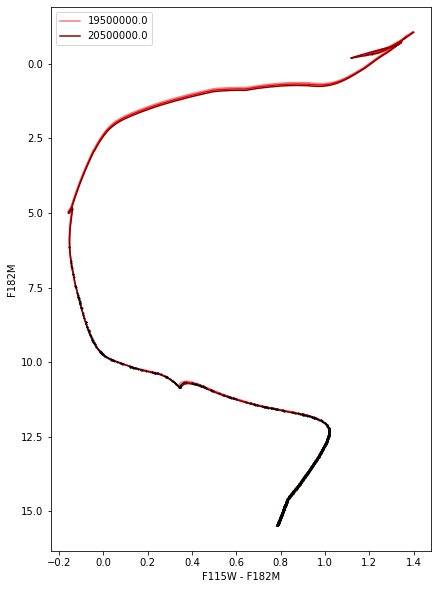

In [10]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
